# Введение в классы в Python

Автор - Рогович Татьяна Владимировна, HSE


# Метод k-ближайших соседей (KNN)

Давайте перейдем к более прикладным задачам и сначала познакомимся с методом k-ближайщих соседей. Потом его реализуем в виде класса.

`kNN` расшифровывается как `k Nearest Neighbor` или `k Ближайших Соседей` — это один из самых простых алгоритмов классификации, также иногда используемый в задачах регрессии. Задача классификации в машинном обучении — это задача отнесения объекта к одному из заранее определенных классов на основании его формализованных признаков. Каждый из объектов в этой задаче представляется в виде вектора в N-мерном пространстве, каждое измерение в котором представляет собой описание одного из признаков объекта. Допустим нам нужно классифицировать мониторы: измерениями в нашем пространстве параметров будут величина диагонали в дюймах, соотношение сторон, максимальное разрешение, наличие HDMI-интерфейса, стоимость и др. 


## Теория

Идея за алгоритмом KNN довольно простая. Он просто считает расстояние от новой точки, до всех известных обучающих точек. Расстояние может быть найдено разными способами. Далее выбирает к-ближайщих точек, где к - целое число. И в конце, на основе классов, к которому принадлежит большинство отобранных точек, присваивает класс новой точке.

Давайте посмотрим на работу алгоритма на основе простого примера. Допустим у нас есть выборка по двум переменным, который изображен на рисунке ниже.

![image.png](1.png)

Нашей задачей будет классифицировать новую точку 'X' в один из классов: `Фиолетовый` или `Красный`. Координаты нашей точки будет равны: x = 45 и y = 50. Пусть количество соседей (K) равно `3`. Алгоритм КНН посчитает расстояния от точки Х до всех остальных точек. Затем он находит, ближайщие по расстоянию до точки Х, точки. Они показаны на рисунке ниже. Три ближайшие точки находятся внутри круга.

![image.png](2.png)

Последний шагом алгоритма будет присвоить новой точке класс большинства ближайшех точек вокруг. На изображении выше, видно что две из трех ближайщех точек принадлежат классу `Красные` и одна точка принадлежит классу `Фиолетовые`. Поэтому новая точка будет классифицирована как `Красный`.

## Датасет

В качестве датасета мы будем использовать знаменитый датасет `iris`. Датасет состоит из четырех аттрибутов: `sepal-width`, `sepal-length`, `petal-width` и `petal-length`. Это аттрибуты конкретных типов расстения Ирис. Задачей является предсказать к какому типу Ириса относится конкретное расстение. Есть три класса в нашем датасете: `Iris-setosa`, `Iris-versicolor` и `Iris-virginica`.

Каждое расстение имеет уникальные "фичи": `sepal length` (длина чашелистика), `sepal width` (ширина чашелистика), `petal length` (длина лепестка) и `petal width` (ширина лепестка). 

Импортируем датасет и загрузим его в пандас:

In [1]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Назовем колонки датасета
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# создадим датасет
dataset = pd.read_csv(url, names=names)

Давайте посмотрим как он выглядит и какие у него есть значения:

In [2]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Дальше разобъем датасет на `фичи` и `метки`. У нас 4 колонки с данными, предсказывать будем только по первым двум.

In [3]:
X = dataset.iloc[:, :-3].values
y = dataset.iloc[:, 4].values

In [4]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [6]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

Массив `X` содержит значения первых двух колонок, а `y` содержит метки классов. Предсказывать мы будем по `sepal-length` и `sepal-width`.

Давайте построим визуализацию алгоритма с помощью `mathplotlib`

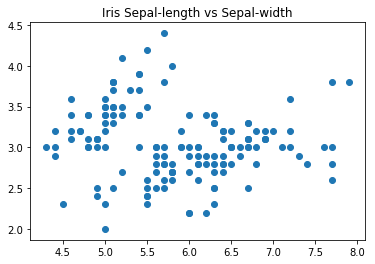

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title("Iris Sepal-length vs Sepal-width")
plt.show()

### Train Test Split

Чтобы не произошло переобучения, мы разделим наш датасет на тренировочную и тестовую выборки, что позволит нам определить насколько хорошо работает наш алгоритм. Таким образом, алгоритм оттестируется на `неизвестных` ему данных, и поэтому может быть применем к реальным приложениям.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Мы использовали функцию `train_tes_split` из модуля `sklearn`. Код выше разделил датасет на 80% обучающих данных и 20% тестовых данных. Это означает что из 150 записей, обучающая выборка будет состоять из примерно 120 элементов, а тестовая из 30.

In [11]:
X_train

array([[4.6, 3.6],
       [5.7, 4.4],
       [6.7, 3.1],
       [4.8, 3.4],
       [4.4, 3.2],
       [6.3, 2.5],
       [6.4, 3.2],
       [5.2, 3.5],
       [5. , 3.6],
       [5.2, 4.1],
       [5.8, 2.7],
       [6. , 3.4],
       [6.7, 3.1],
       [5.4, 3.9],
       [5.4, 3.7],
       [5.5, 2.4],
       [6.3, 2.8],
       [6.4, 3.1],
       [6.6, 3. ],
       [7.2, 3.6],
       [5.7, 2.9],
       [7.6, 3. ],
       [5.6, 3. ],
       [5.1, 3.5],
       [7.7, 2.8],
       [5.8, 2.7],
       [5.2, 3.4],
       [5. , 3.5],
       [5.1, 3.8],
       [5. , 2. ],
       [6.3, 2.7],
       [4.8, 3.4],
       [5. , 3. ],
       [5.1, 3.3],
       [5.6, 2.7],
       [5.1, 3.4],
       [5.7, 3. ],
       [7.7, 3.8],
       [4.6, 3.2],
       [6.2, 2.9],
       [5.7, 2.5],
       [5.5, 4.2],
       [6. , 3. ],
       [5.8, 2.7],
       [6. , 2.2],
       [5.4, 3. ],
       [6.2, 3.4],
       [5.5, 2.3],
       [5.4, 3.9],
       [5. , 2.3],
       [6.4, 2.7],
       [5. , 3.3],
       [5. ,

In [12]:
print(len(X_train),len(y_train))

120 120


In [13]:
print(len(X_test),len(y_test))

30 30


## Простая реализация KNN

Теперь, имея обучающую выборку, можно реализовать и сам алгоритм классификации:

In [14]:
def dist (a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5

В качестве способам нахождения расстояния от искомой точки до ближайщих соседей, будем использовать `евклидово расстояние`. Для определения расстояния между объектами можно использовать не только евклидово расстояние: также применяются манхэттенское расстояние, косинусная мера, критерий корелляции Пирсона и др.

In [15]:
def predict(X_train, y_train, x_test, k):
    # создадим список для расстояний и словарь k-значений рядом
    distances = []
    targets = {}

    for i in range(len(X_train)):
        # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
        distances.append([dist(x_test,X_train[i]), i])

    # отсортируем расстояния
    distances = sorted(distances)
    
    # создадим словарь с k ближайщими значениями
    for i in range(k):
        index = distances[i][1]
        if targets.get(y_train[index]) != None:
            targets[y_train[index]] += 1
        else:
            targets[y_train[index]] = 1
        
    # вернем самую часто встречающаюся метку
    return max(targets,key=targets.get)

Мы создали изначально список `distances` и словарь `targets`. В `distances` мы будем хранить расстояния от искомой точки, до всех остальных + индекс этой точки. А в `targets` ближайщие `k` соседей от нашей искомой точки.

После нахождения всех расстояний, мы сортируем массив по возрастанию дальности точек. Потом мы берем первые `k` точек в начале списка `distances` и записываем количество встречающихся лейблов в этих `k` точках.

И возвращаем лейбл, который встречается чаще всего.

In [17]:
# Создадим список с будущими предсказаниями
predictions = []
# количество соседей
k = 7
# идем по все тестовым данным
for i in range(len(X_test)):
    predictions.append(predict(X_train, y_train, X_test[i], k))

Давайте посмотрим, какие предсказания мы получили

In [18]:
print(predictions)

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']


А вот что должно было быть

In [19]:
print(y_test)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


Визуализируем изначальные метки. Переведем текстовые значения меток в численные.

In [20]:
colors = []
for c in y:
    if c == "Iris-setosa":
        colors.append(0)
    elif c == "Iris-versicolor":
        colors.append(1)
    else:
        colors.append(2)

Обучающие данные

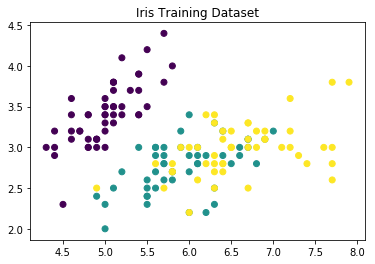

In [21]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Iris Training Dataset")
plt.show()

Покрасим, предсказанные данные

In [31]:
colors = []
for c in predictions:
    if c == "Iris-setosa":
        colors.append(0)
    elif c == "Iris-versicolor":
        colors.append(1)
    else:
        colors.append(2)
        
colors_actual = []
for c in y_test:
    if c == "Iris-setosa":
        colors_actual.append(0)
    elif c == "Iris-versicolor":
        colors_actual.append(1)
    else:
        colors_actual.append(2)

In [ ]:
colors_actual = []
for c in y_test:
    if c == "Iris-setosa":
        colors_actual.append(0)
    elif c == "Iris-versicolor":
        colors_actual.append(1)
    else:
        colors_actual.append(2)

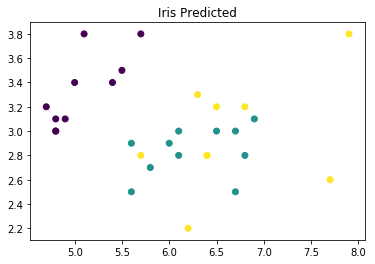

In [41]:
plt.scatter(X_test[:,0],X_test[:,1], c=colors)
plt.title("Iris Predicted")
plt.show()

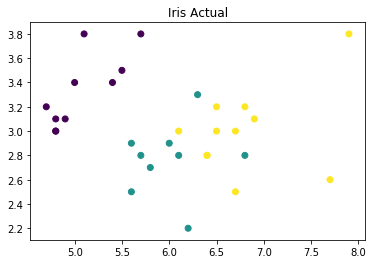

In [42]:
plt.scatter(X_test[:,0],X_test[:,1], c=colors_actual)
plt.title("Iris Actual")
plt.show()

А теперь посчитаем, насколько качественно работает наш алгоритм:

In [43]:
correct = 0
for i in range(len(y_test)):
    if y_test[i] == predictions[i]:
        correct += 1
        
print(correct, '/', len(y_test))
correct/len(y_test)

22 / 30


0.7333333333333333

Из 30 значений, 22 оказалось верным, что дает нам 73% правильности классификации

## Реализация KNN в виде класса

У нас уже есть все нужные нам функции, поэтому реализуем КНН в виде класса. Он у нас будет состоять из конструктора, где мы инициализруем переменные, функции `dist`, которая возвращает евклидово расстояние, функции `fit`, которая будет подготовливать наш классификатор и функции `predict`, которая будет возвращать нам предсказанные значения. Также создадим функцию `score` и функцию `plot`. Первая будет считает процент корректности предсказанных данных, а вторая рисовать графики.

In [53]:
class KNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.k = None
        self.predictions = []
    
    @staticmethod
    def _dist(a, b):
        """
        Расстояние евклида
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
    
    @staticmethod
    def score(y_test, predictions):
        """
        Принимает на вход два массива с данными: тестовый и предсказанный

        Возвращает: число с плавающей точкой
        """
        correct = 0
        for i in range(len(y_test)):
            if y_test[i] == predictions[i]:
                correct += 1
        return correct/len(y_test)
    
    def plot(self, y_test):
        colors = []
        for c in y_test:
            if c == "Iris-setosa":
                colors.append(0)
            elif c == "Iris-versicolor":
                colors.append(1)
            else:
                colors.append(2)
                        
                
        plt.scatter(X_test[:,0], X_test[:,1], c=colors)
        plt.title("Real Data")
        plt.show()
        
        colors = []
        i = 0
        for c in self.predictions:
            if c == "Iris-setosa":
                colors.append(0)
            elif c == "Iris-versicolor":
                colors.append(1)
            else:
                colors.append(2)
            
        plt.scatter(X_test[:,0], X_test[:,1], c=colors)
        plt.title("Predicted")
        plt.show()
        

    def fit(self, X_train, y_train, k):
        """
        Принимает на вход два массива с данными: тренировочный Х и тренировочные лейблы
        и k - количество соседей
        
        """
        self.X_train = X_train
        self.y_train = y_train
        self.k = k

    def predict(self, X_test):
        """
        Принимает на вход двумерный массив искомых точек

        Возвращает: список предсказаний
        """
        
        for i in range(len(X_test)):
            distances = []
            targets = {}

            for j in range(len(X_train)):
                # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
                distances.append([self._dist(X_test[i], X_train[j]), j])

            # отсортируем расстояния
            distances = sorted(distances)

            # создадим словарь с k ближайщими значениями
            for j in range(self.k):
                index = distances[j][1]
                if targets.get(y_train[index]) != None:
                    targets[y_train[index]] += 1
                else:
                    targets[y_train[index]] = 1

            # вернем самую часто встречающаюся метку
            self.predictions.append(max(targets,key=targets.get))

        return self.predictions

А теперь попробую его в деле на том же датасете

In [54]:
knn = KNN()
knn.fit(X_train,y_train,7)

pred = knn.predict(X_test)
print(pred)
print(knn.score(y_test,pred))

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']
0.7333333333333333


В нашем классе мы использовали статические методы `__dist`, `score`. Давайте построим график с помощью метода экземпляра класса:

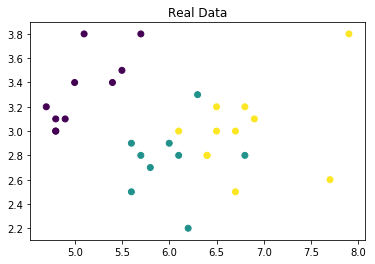

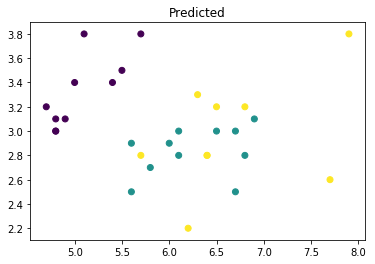

In [55]:
knn.plot(y_test)

## Класс KNN с другой функций расстояние

Давайт создадим второй класс КНН, который теперь использует другую функцию расстояния. Создавать второй класс с нуля не будем, а воспользуемся свойством классов - наследование. В новой классе поменяем только функцию расстояния, а все остальное оставим таким же. Для нахождения косинусной меры, используем функцию `cosine` из библиотеки `scipy` 

In [57]:
from scipy.spatial import distance

class cosKNN(KNN):
    
    @staticmethod
    def _dist(a,b):
        """
        Через косинусную меру

        возвращаетs: число с плавающей точкой
        """
        return distance.cosine(a,b)

In [61]:
cos_kNN = cosKNN()
cos_kNN.fit(X_train,y_train,7)
pred = cos_kNN.predict(X_test)
print(cosKNN.score(y_test,pred))

0.6666666666666666


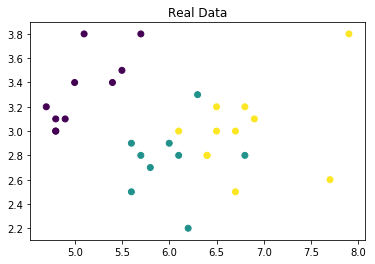

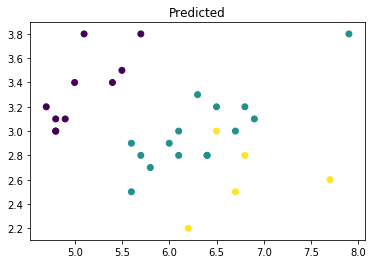

In [62]:
cos_kNN.plot(y_test)

## Класс KNN с поддержкой нескольких функций расстояния

Выше мы создали два класса, один из которых наследовался с новой функцией расстояния (метрикой). Но это все можно было реализовать в рамках нашего одного базового класса. Давайте применим все наши знания о классах и создадим его,также модицифируем метод `score` и `dist`.

In [64]:
class ultimateKNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.k = None
        self.metric = None
        self.predictions = []
    
    def __dist(self, a, b):
        """
        Расстояние евклида или косинусная мера
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        if self.metric == "eucl":
            return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
        elif self.metric == "cos":
            return distance.cosine(a,b)
    
    def score(self, y_test):
        """
        Принимает на вход два массива с данными: тестовый и предсказанный

        Возвращает: число с плавающей точкой
        """
        k = 0
        for i in range(len(y_test)):
            if y_test[i] == self.predictions[i]:
                k += 1
        return k/len(y_test)
    
    def plot(self, y_test):
        colors = []
        for c in y_test:
            if c == "Iris-setosa":
                colors.append(0)
            elif c == "Iris-versicolor":
                colors.append(1)
            else:
                colors.append(2)
        Xx = []
        Yy = []
        for i in X_test:
            Xx.append(i[0])
            Yy.append(i[1])
            
                
        plt.scatter(Xx, Yy, c=colors)
        plt.title("Iris Real Data")
        plt.show()
        
        colors = []
        for c in self.predictions:
            if c == "Iris-setosa":
                colors.append(0)
            elif c == "Iris-versicolor":
                colors.append(1)
            else:
                colors.append(2)
            
        plt.scatter(Xx,Yy, c=colors)
        plt.title("Iris Predicted")
        plt.show()

    def fit(self, X_train, y_train, k, metric = "eucl"):
        """
        Принимает на вход два массива с данными: тестовый Х и тестовый лейблы
        и k - количество соседей
        
        """
        self.X_train = X_train
        self.y_train = y_train
        self.k = k
        self.metric = metric

    def predict(self, X_test):
        """
        Принимает на вход двумерный массив искомых точек

        Возвращает: список предсказаний
        """
        
        for i in range(len(X_test)):
            distances = []
            targets = {}

            for j in range(len(X_train)):
                # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
                distances.append([self.__dist(X_test[i], X_train[j]), j])

            # отсортируем расстояния
            distances = sorted(distances)

            # создадим словарь с k ближайщими значениями
            for j in range(self.k):
                index = distances[j][1]
                if targets.get(y_train[index]) != None:
                    targets[y_train[index]] += 1
                else:
                    targets[y_train[index]] = 1

            # вернем самую часто встречающаюся метку
            self.predictions.append(max(targets,key=targets.get))

        return self.predictions

In [65]:
ult_kNN = ultimateKNN()
ult_kNN.fit(X_train,y_train,7)
print(ult_kNN.predict(X_test))
print(ult_kNN.score(y_test))

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']
0.7333333333333333


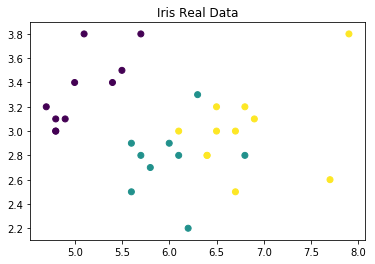

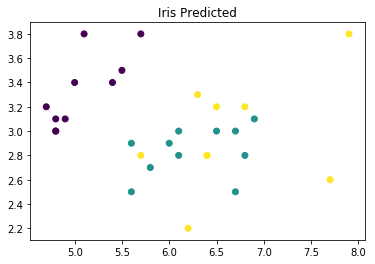

In [66]:
ult_kNN.plot(y_test)

Мы создали класс, который в зависимости от указанной метрики выбирает способ подсчета расстояния до точек. Если мы ничего не задаем или задаем `eucl`, то будем считать через расстояние евклида, иначе через косинусную меру.

In [67]:
ult_kNN = ultimateKNN()
ult_kNN.fit(X_train,y_train,7,'cos')
print(ult_kNN.predict(X_test))
print(ult_kNN.score(y_test))

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa']
0.6666666666666666


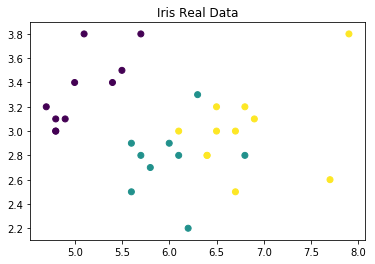

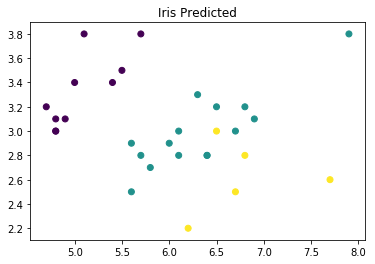

In [68]:
ult_kNN.plot(y_test)

Давайте теперь сделаем сетку - построим несколько кнн классификаторов с разными `k` и посмотрим какой из них круче:

In [69]:
for i in range(1,10):
    knn = ultimateKNN()
    knn.fit(X_train,y_train,i)
    knn.predict(X_test)
    print("k = " + str(i), ", Score: " + str(knn.score(y_test)))

k = 1 , Score: 0.8
k = 2 , Score: 0.8
k = 3 , Score: 0.8
k = 4 , Score: 0.8666666666666667
k = 5 , Score: 0.8
k = 6 , Score: 0.8666666666666667
k = 7 , Score: 0.7333333333333333
k = 8 , Score: 0.8
k = 9 , Score: 0.8


In [70]:
for i in range(1,10):
    knn = ultimateKNN()
    knn.fit(X_train,y_train,i,"cos")
    knn.predict(X_test)
    print("k = " + str(i), ", Score: " + str(knn.score(y_test)))

k = 1 , Score: 0.7
k = 2 , Score: 0.7
k = 3 , Score: 0.6666666666666666
k = 4 , Score: 0.6
k = 5 , Score: 0.6333333333333333
k = 6 , Score: 0.6666666666666666
k = 7 , Score: 0.6666666666666666
k = 8 , Score: 0.7333333333333333
k = 9 , Score: 0.6666666666666666


Как мы видим, евклидово расстояние на нашем датасете работает лучше.

# Заключение

Мы познакомились с классами и создали в качестве примера класс, который реализует метод kNN. kNN — один из простейших алгоритмов классификации, у которого все же есть свои недостатки. Помимо точности классификации, проблемой этого классификатора является скорость классификации: если в обучающей выборке `N` объектов, в тестовой выборке `M` объектов, а размерность пространства — `K`, то количество операций для классификации тестовой выборки может быть оценено как `O(K\*M\*N)`. 